# import

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

import matplotlib as plt

# OG Df

In [2]:
titanic_data = pd.read_csv("train.csv")
titanic_data_test = pd.read_csv("test.csv")
titanic_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### What to do

PassengerId - none
HomePlanet - fill with earth or europa (check which is better)
CryoSleep - fill with false
Cabin - try dropping
Destination - fill with trapist (see correlation between who started and ended where to predict) 
Age - fill na with estimate (impute)
VIP - fill empty with false
RoomService - fill with 0.0
FoodCourt - fill with 0.0
ShoppingMall - fill with 0.0
Spa - fill with 0.0
VRDeck - fill with 0.0
Name - drop
Transported - none

## Cleaning

In [3]:
titanic_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
for col in titanic_data.columns:
    pct_missing = np.mean(titanic_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PassengerId - 0%
HomePlanet - 2%
CryoSleep - 2%
Cabin - 2%
Destination - 2%
Age - 2%
VIP - 2%
RoomService - 2%
FoodCourt - 2%
ShoppingMall - 2%
Spa - 2%
VRDeck - 2%
Name - 2%
Transported - 0%


In [5]:
missing_val_count_by_column = (titanic_data.isnull().sum())
missing_val_count_by_column

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

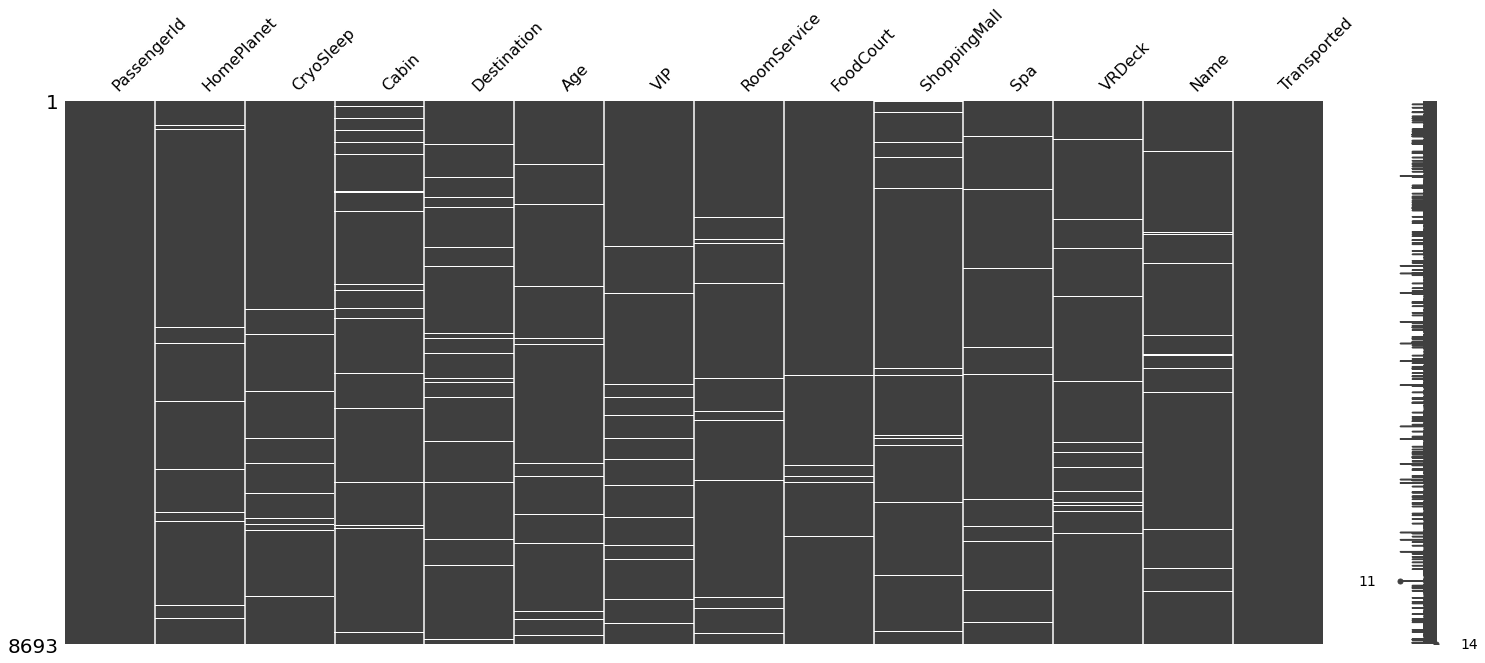

In [25]:
#https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87
import missingno as msno

msno.matrix(titanic_data)

In [6]:
## Testing
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

## Drop

In [7]:
newdf = titanic_data.drop(['Name', 'Cabin'], axis=1)
newdf

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## X and y

In [26]:
titanic_features = ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
titanic_features_numeric = ['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']



In [27]:
X = titanic_data[titanic_features_numeric]
y = titanic_data.Transported


## Split Up

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

## Imputing

In [36]:
#https://stackoverflow.com/questions/49805945/scikit-learn-impute-values-in-a-specific-column
Numeric = titanic_data._get_numeric_data()

imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid))


median = 
most_frequent = 
constant = 
mean = 


In [48]:
titanic_model_1 = RandomForestClassifier(random_state = 0)

titanic_model_1.fit(imputed_X_train, y_train)

val_predictions_1 = titanic_model_1.predict(imputed_X_valid)

X_test = titanic_data_test[titanic_features_numeric]

test_preds = titanic_model_1.predict(X_test)

/Users/ashleyshell/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [44]:
sample_submission = pd.read_csv('sample_submission.csv')

output = pd.DataFrame({'PassengerId': sample_submission.PassengerId,
'Transported': test_preds})
output.to_csv('titanic_1.csv', index=False)

NameError: name 'test_preds' is not defined